![SNAR9](https://pbs.twimg.com/media/Fj3TTiUWYAAB9vm?format=jpg&name=medium)

### <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Libraries </font>

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import mmread
import seaborn as sns
import pandas as pd
import powerlaw as po
import pandas as pd
from random import sample, choices
from copy import copy
plt.style.use("fivethirtyeight")

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P9.1
Find the analytical formula of the ergodic density for random walk on a graph given by adjacency matrix A with Markov A operator p ji = k ij i .

$M · x = λ · x$

We show that every eigenvalue $λ$ of $M$ is at most 1. Suppose x is the corresponding eigenvector. Say the largest coordinate is i. Then $λ x_i = \sum_{j:\{i,j\}∈E}{\frac{x_j}{d}}$ by definition. If λ > 1 then at least one of the neighbors must have $x_j > x_i$, which is a contradiction. By similar argument we conclude that every eigenvalue of $M$ is at most −1 in absolute value.

So we need to find right eigenvector of $M$ with eigenvalue of 1 

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P9.2
Determine numerically (looking for the eigenvector) values of ergodic density for the random walk on selected network.

In [279]:
n=10

p=0.4

R=np.random.sample(size=(n,n))

A=np.ones((n,n))*p

A=(A>R)*1

A=np.triu(A, k=0)

G = nx.from_numpy_matrix(A)

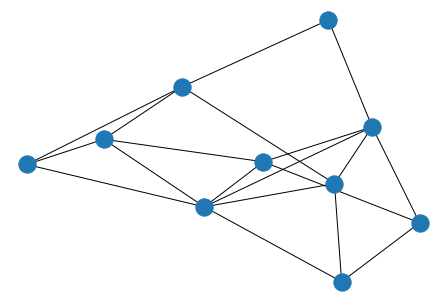

In [280]:
nx.draw(G)

In [281]:
np.fill_diagonal(A, 0)

A=A+A.T

A=A/A.sum(axis=1)

E,V=np.linalg.eig(A)

In [285]:
E

array([ 1.        ,  0.52923622, -0.71075286, -0.5810487 , -0.42097721,
       -0.26628394, -0.16458548,  0.00658994,  0.34421214,  0.26360989])

In [286]:
V[:,0]

array([-0.24019223, -0.48038446, -0.16012815, -0.32025631, -0.24019223,
       -0.32025631, -0.40032038, -0.32025631, -0.24019223, -0.32025631])

In [287]:
VD=V[:,0]/np.sum(V[:,0])

In [288]:
VD @ A.T - VD

array([ 2.77555756e-17,  2.77555756e-17,  9.02056208e-17,  4.16333634e-17,
       -2.77555756e-17, -1.24900090e-16, -8.32667268e-17,  6.93889390e-17,
        0.00000000e+00, -4.16333634e-17])

In [289]:
VD

array([0.07894737, 0.15789474, 0.05263158, 0.10526316, 0.07894737,
       0.10526316, 0.13157895, 0.10526316, 0.07894737, 0.10526316])

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P9.3
Determine dynamically (by iterating the Markov operator) ergodic density for the random walk on selected network.

In [316]:
V=np.zeros(n)

In [317]:
V[0]=1

In [318]:
for i in range(100):
    V=A @ V

In [319]:
V

array([0.07894737, 0.15789474, 0.05263158, 0.10526316, 0.07894737,
       0.10526316, 0.13157895, 0.10526316, 0.07894737, 0.10526316])

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P9.5
Determine the value of classic or modiﬁed pagerank for the selected network.

In [320]:
G = mmread('ca-netscience.mtx')
G = G.todense()
G = np.matrix(G)
G=nx.Graph(G)

In [321]:
pr = nx.pagerank(G)

In [329]:
low, *_, high = sorted(pr.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

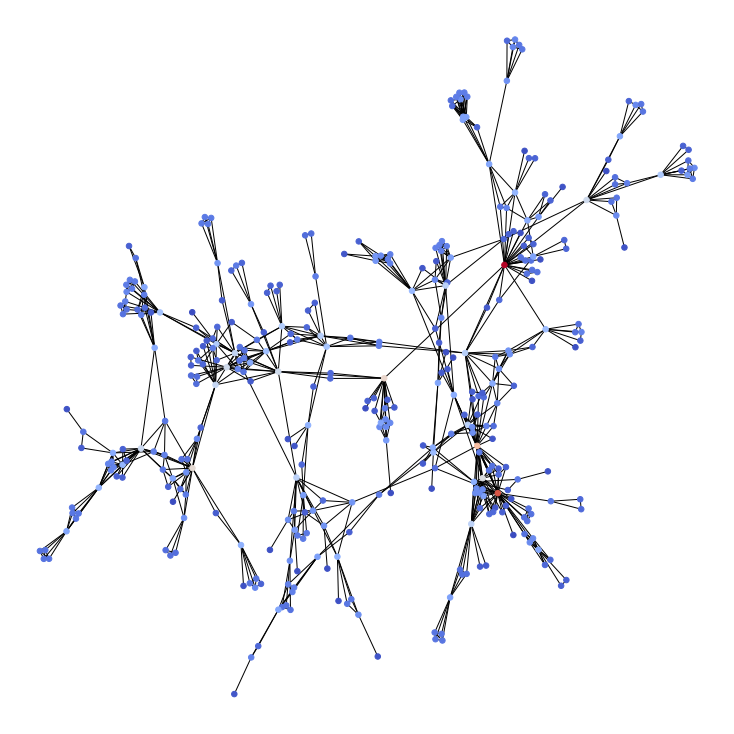

In [337]:
plt.figure(figsize=(10,10))
nx.draw(G, 
        nodelist=pr,
        node_size=30,
        node_color=[mapper.to_rgba(i) 
                    for i in pr.values()])
plt.show()

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P9.6
Find a graph with a ﬁxed number of edges and vertices where diffusion occurs fastest (hint: value a second eigenvalue can help).
    
To use simulated annealing to find the fastest diffusion rate, you would start with an initial graph structure and simulate the spread of information through the graph. You would then calculate a measure of the diffusion rate, such as the time it takes for the information to reach a certain percentage of the nodes.

In [9]:
class DiffusionModel:
    def __init__(self, V, E):
        self.adj = self._create_random_graph(V, E)
        self._create_random_graph(V, E)
        self.V = V
        self.E = E

    def _create_random_graph(self, V, E):
        pairs = []

        for i in range(V):
            for j in range(V):
                if j > i:
                    pairs.append((i,j))

        s = sample(pairs, E)
        adj = np.zeros((V,V))

        for i,j in s:
            adj[i, j] = 1
            adj[j, i] = 1

        return adj

    def draw(self):
        graph = nx.convert_matrix.from_numpy_matrix(self.adj)
        nx.draw_shell(graph)
        plt.show()

    def random_walk(self):
        visited = np.zeros(self.V)
        start = np.random.choice(range(self.V))
        visited[start] = 1
        steps = 0

        while visited.sum() != self.V:
            steps += 1
            r = choices(np.array(range(self.V)), weights = self.adj[start, :])[0]
            visited[r] = 1
            start = r

        return steps

    def expected_time(self, iters):
        if not self.is_connected():
            print('Graph is not connected')
            return np.nan

        return sum([self.random_walk() for _ in range(iters)])/iters

    def is_connected(self):
        graph = nx.convert_matrix.from_numpy_matrix(self.adj)
        return nx.is_connected(graph)

    def simulated_annealing(self, iters_EV, iters_SA, t0, alpha):
        t = t0
        current_EV = self.expected_time(iters_EV)
        best_adj = self.adj
        best_EV = current_EV

        for _ in range(iters_SA):
            if current_EV < best_EV:
                best_adj = self.adj

            neigh = self.replace_edge()
            neigh_EV = neigh.expected_time(iters_EV)

            if neigh_EV < current_EV:
                current_EV = neigh_EV
                self.adj = neigh.adj

            else:
                p = np.exp(-(neigh_EV - current_EV)/t)
                if np.random.uniform() < p:
                    current_EV = neigh_EV
                    self.adj = neigh.adj

            print(f'Iteration {_+1}. Time: {current_EV}')
            t = t * alpha

        self.adj = best_adj
        self.EV = best_EV

    def replace_edge(self):
        old = None
        new = None

        while (old is None) or (new is None):
            i,j = choices(range(self.V), k = 2)

            if (old is None) and (self.adj[i,j] == 1):
                old = (i, j)

            if (new is None) and (self.adj[i, j] == 0):
                new = (i, j)

        graph = DiffusionModel(self.V, self.E)
        graph.adj = copy(self.adj)

        graph.adj[old[0], old[1]] = 0
        graph.adj[old[1], old[0]] = 0

        graph.adj[new[0], new[1]] = 1
        graph.adj[new[1], new[0]] = 1

        return graph

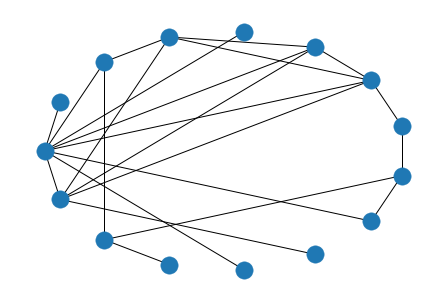

In [11]:
diffusionModel = DiffusionModel(15, 22)
diffusionModel.draw()

In [12]:
diffusionModel.simulated_annealing(100, 250, 1, 0.995)

Iteration 1. Time: 125.25
Iteration 2. Time: 121.36
Iteration 3. Time: 121.09
Iteration 4. Time: 120.65
Iteration 5. Time: 115.64
Graph is not connected
Iteration 6. Time: 115.64
Iteration 7. Time: 89.74
Iteration 8. Time: 89.74
Iteration 9. Time: 89.74
Iteration 10. Time: 89.74
Iteration 11. Time: 89.74
Iteration 12. Time: 89.74
Iteration 13. Time: 89.74
Iteration 14. Time: 89.74
Iteration 15. Time: 89.74
Iteration 16. Time: 89.74
Iteration 17. Time: 89.74
Iteration 18. Time: 89.74
Iteration 19. Time: 89.74
Iteration 20. Time: 89.74
Iteration 21. Time: 89.87
Iteration 22. Time: 89.87
Iteration 23. Time: 89.87
Iteration 24. Time: 89.87
Iteration 25. Time: 89.87
Iteration 26. Time: 89.87
Iteration 27. Time: 89.87
Iteration 28. Time: 89.87
Iteration 29. Time: 89.87
Iteration 30. Time: 89.87
Iteration 31. Time: 89.87
Iteration 32. Time: 89.87
Iteration 33. Time: 89.87
Iteration 34. Time: 89.87
Iteration 35. Time: 85.88
Iteration 36. Time: 85.88
Iteration 37. Time: 82.45
Iteration 38. Time

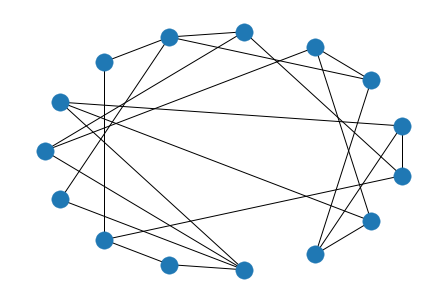

In [13]:
diffusionModel.draw()

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)